In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Analysis of Changes in Earth's Rotational Angular Velocity (LOD)

In this analysis, we examine changes in Earth's rotational angular velocity (LOD - Length of Day) and the corresponding change in Earth's rotational kinetic energy. The analysis is carried out based on two sets of data: one taking into account tidal effects and the other without them.

### Key Constants and Formulas

- The moment of inertia of the Earth, $I$: $8.0365 \times 10^{37} \text{ kg} \cdot \text{m}^2$
- Seconds in a day: $86400 \text{ s}$
- The reference value for the angular velocity of Earth's rotation, $\omega_{\text{ref}}$: $7292115.1467064 \text{ picorad/s}$
- Conversion from picoradians to radians: $1 \text{ picorad} = 10^{-12} \text{ radians}$
- Energy of the "Tsar Bomba", $E_{\text{Tsar Bomba}}$: $2.45 \times 10^{17} \text{ J}$

### Calculational Formulas

1. Converting angular velocity from picoradians/s to radians/s:
$$ \omega = (\omega_{\text{ref}} + \omega_{\text{measured}}) \times 10^{-12} $$

2. Calculating kinetic energy based on angular velocity:
$$ E_{\text{kin}} = \frac{1}{2} I \omega^2 $$

3. Converting energy from joules to the equivalents of "Tsar Bomba":
$$ E_{\text{Tsar Bomba}} = \frac{E_{\text{joules}}}{E_{\text{Tsar Bomba}}} $$


In [15]:
# Defining the data structure
columns = ['year', 'month', 'day', 'x', 'sig_x', 'y', 'sig_y', 'ut1_utc', 'sig_ut1_utc', 'ut1_tai', 'sig_ut1_tai',
           'dX', 'sig_dX', 'dY', 'sig_dY', 'dx_dt', 'sig_dx_dt', 'dy_dt', 'sig_dy_dt', 'lod', 'sig_lod', 'w3', 'sig_w3']
           
# Loading the first file with LOD data considering tidal effects
file_path1 = 'data_from_IERS/EOP_C04_v01.txt'
data1 = pd.read_csv(file_path1, delim_whitespace=True, comment='#', names=columns)

# Loading the second file with LOD data without considering tidal effects
file_path2 = 'data_from_IERS/EOP_C04_v02.txt'
data2 = pd.read_csv(file_path2, delim_whitespace=True, comment='#', names=columns)

# Merging data from both files
merged_data = data1[['year', 'month', 'day', 'w3', 'sig_w3']].copy()
merged_data['w3_no_tide'] = data2['w3']

# Creating 'Date' column based on 'year', 'month', and 'day' columns
merged_data['Date'] = pd.to_datetime(merged_data[['year', 'month', 'day']])

# Removing unnecessary columns
merged_data = merged_data[['Date', 'w3', 'w3_no_tide', 'sig_w3']]

# Copying data to a new dataset
lod_df = merged_data.copy()

In [16]:
# Constants and reference values
moment_of_inertia = 8.0365e37  # Earth's moment of inertia (kg·m²)
seconds_per_day = 86400  # Seconds in a day
reference_angular_velocity = 72921151.467064  # Reference angular velocity of Earth's rotation in picorad/s
picorad_to_rad = 1e-12  # 1 picoradian = 10^-12 radians
energy_tsar_bomba_joules = 2.45e17  # Energy of "Tsar Bomba" (Joules)

# Functions for calculations
def calculate_angular_velocity(picorad_per_sec):
    # Convert to radians per second and add the measured value to the reference
    return (reference_angular_velocity + picorad_per_sec) * picorad_to_rad

def calculate_kinetic_energy(angular_velocity):
    # Calculate kinetic energy using the formula
    return 0.5 * moment_of_inertia * angular_velocity ** 2

def joules_to_tsar_bomba(joules):
    # Convert energy from joules to the equivalent of "Tsar Bomba"
    return joules / energy_tsar_bomba_joules

def watts_to_tsar_bomba_per_day(watts):
    # Convert power from watts to the equivalent of "Tsar Bomba" per day
    return (watts * seconds_per_day) / energy_tsar_bomba_joules

# Calculations
lod_df['Angular_Velocity'] = calculate_angular_velocity(lod_df['w3'])
lod_df['Angular_Velocity_no_tide'] = calculate_angular_velocity(lod_df['w3_no_tide'])

lod_df['Kinetic_Energy'] = calculate_kinetic_energy(lod_df['Angular_Velocity'])
lod_df['Kinetic_Energy_no_tide'] = calculate_kinetic_energy(lod_df['Angular_Velocity_no_tide'])

lod_df['Change_in_Kinetic_Energy'] = lod_df['Kinetic_Energy'].diff()
lod_df['Change_in_Kinetic_Energy_no_tide'] = lod_df['Kinetic_Energy_no_tide'].diff()

lod_df['Change_in_Kinetic_Energy_TsarBomba'] = joules_to_tsar_bomba(lod_df['Change_in_Kinetic_Energy'])
lod_df['Change_in_Kinetic_Energy_TsarBomba_no_tide'] = joules_to_tsar_bomba(lod_df['Change_in_Kinetic_Energy_no_tide'])

lod_df['RMS_Change_in_Kinetic_Energy'] = np.sqrt((lod_df['Change_in_Kinetic_Energy'] ** 2).rolling(window=365).mean())
lod_df['RMS_Change_in_Kinetic_Energy_no_tide'] = np.sqrt((lod_df['Change_in_Kinetic_Energy_no_tide'] ** 2).rolling(window=365).mean())

# Recalculating RMS estimate in "Tsar Bomba" for before and after subtracting tides
lod_df['RMS_Change_in_Kinetic_Energy_TsarBomba'] = joules_to_tsar_bomba(lod_df['RMS_Change_in_Kinetic_Energy'])
lod_df['RMS_Change_in_Kinetic_Energy_TsarBomba_no_tide'] = joules_to_tsar_bomba(lod_df['RMS_Change_in_Kinetic_Energy_no_tide'])

RMS_KE = np.sqrt((lod_df['Change_in_Kinetic_Energy'] ** 2).mean())
RMS_KE2 = np.sqrt((lod_df['Change_in_Kinetic_Energy_no_tide'] ** 2).mean())
RMS_KE_CB = joules_to_tsar_bomba(RMS_KE)
RMS_KE2_CB = joules_to_tsar_bomba(RMS_KE2)
RMS_KE_CB, RMS_KE2_CB

(2794.451265127293, 709.1486623078166)

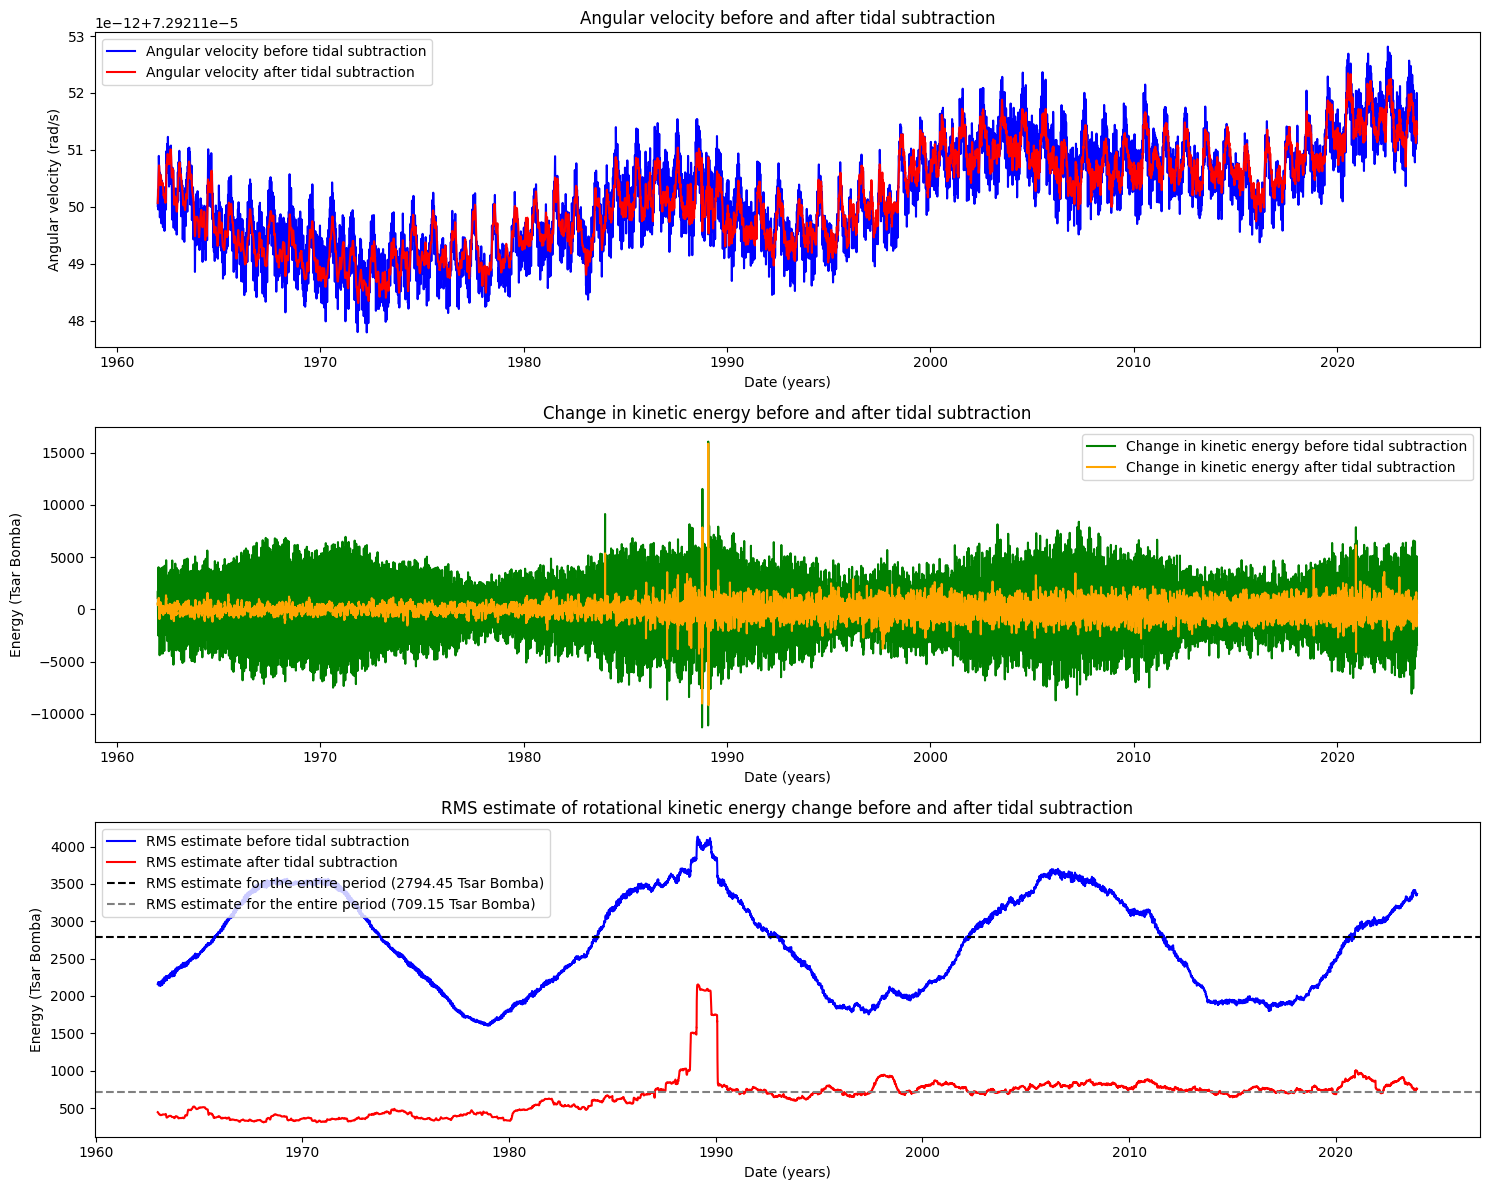

In [17]:
# Graphs
plt.figure(figsize=(15, 12))
# Angular velocity before and after tidal subtraction
plt.subplot(3, 1, 1)
plt.plot(lod_df['Date'], lod_df['Angular_Velocity'], label='Angular velocity before tidal subtraction', color='blue')
plt.plot(lod_df['Date'], lod_df['Angular_Velocity_no_tide'], label='Angular velocity after tidal subtraction', color='red')
plt.title('Angular velocity before and after tidal subtraction')
plt.xlabel('Date (years)')
plt.ylabel('Angular velocity (rad/s)')
plt.legend()

# Change in kinetic energy before and after tidal subtraction
plt.subplot(3, 1, 2)
plt.plot(lod_df['Date'], lod_df['Change_in_Kinetic_Energy_TsarBomba'], label='Change in kinetic energy before tidal subtraction', color='green')
plt.plot(lod_df['Date'], lod_df['Change_in_Kinetic_Energy_TsarBomba_no_tide'], label='Change in kinetic energy after tidal subtraction', color='orange')
plt.title('Change in kinetic energy before and after tidal subtraction')
plt.xlabel('Date (years)')
plt.ylabel('Energy (Tsar Bomba)')
plt.legend()

# RMS estimate of energy change in "Tsar Bomba" before and after tidal subtraction
plt.subplot(3, 1, 3)
plt.plot(lod_df['Date'], lod_df['RMS_Change_in_Kinetic_Energy_TsarBomba'], label='RMS estimate before tidal subtraction', color='blue')
plt.plot(lod_df['Date'], lod_df['RMS_Change_in_Kinetic_Energy_TsarBomba_no_tide'], label='RMS estimate after tidal subtraction', color='red')
plt.axhline(y=RMS_KE_CB, color='black', linestyle='--', label='RMS estimate for the entire period (2794.45 Tsar Bomba)')
plt.axhline(y=RMS_KE2_CB, color='gray', linestyle='--', label='RMS estimate for the entire period (709.15 Tsar Bomba)')
plt.title('RMS estimate of rotational kinetic energy change before and after tidal subtraction')
plt.xlabel('Date (years)')
plt.ylabel('Energy (Tsar Bomba)')
plt.legend()

plt.tight_layout()

#plt.savefig('RotEnergy_figure.png', dpi=300)
plt.show()
# Close figure object to free up memory
plt.close()